In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cellbayesassay as cba
import os.path
import re
import warnings
import attila_utils

In [2]:
fpath = '../../resources/cell-based-assays/NIA_Tau_Infl_GFW-CO25360-v2-cleaned.xlsx'
data = pd.read_excel(fpath, sheet_name='Sheet1')
data.loc[data.Activity.apply(lambda x: isinstance(x, str)), 'Activity'] = np.nan
data['Activity'] = data.Activity.astype(float)
data

,Study,Experiment,Assay,Batch,Plate,TI,conc,Activity
0,CO25360,Tau phosphorylation,Tau,1,1,TI1,c1,445274.0
1,CO25360,Tau phosphorylation,Tau,1,1,TI1,c1,364405.0
2,CO25360,Tau phosphorylation,Tau,1,1,TI1,c1,458060.0
3,CO25360,Tau phosphorylation,Tau,1,1,TI1,c1,490983.0
4,CO25360,Tau phosphorylation,Tau,1,1,TI1,c1,408649.0
...,...,...,...,...,...,...,...,...
10237,CO25360,Trophic factor withdrawal (primary neurons),YOPRO,3,5,TI27,c3,109.7
10238,CO25360,Trophic factor withdrawal (primary neurons),YOPRO,3,5,TI27,c3,110.6
10239,CO25360,Trophic factor withdrawal (primary neurons),YOPRO,3,5,TI27,c3,113.4
10240,CO25360,Trophic factor withdrawal (primary neurons),YOPRO,3,5,TI27,c3,97.0


In [3]:
data_fpath = '../../resources/cell-based-assays/NIA_Tau_Infl_GFW-CO25360-v2-cleaned.xlsx'
data = cba.get_data(data_fpath, sheet_name='Sheet1', TI_fpath='../../resources/cell-based-assays/test-items3a-v2.csv')
data

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity
0,CO25360,Tau phosphorylation,Tau,1,1,TI1,Valproic acid,c1,0.00005,-4.30103,445274.0
1,CO25360,Tau phosphorylation,Tau,1,1,TI1,Valproic acid,c1,0.00005,-4.30103,364405.0
2,CO25360,Tau phosphorylation,Tau,1,1,TI1,Valproic acid,c1,0.00005,-4.30103,458060.0
3,CO25360,Tau phosphorylation,Tau,1,1,TI1,Valproic acid,c1,0.00005,-4.30103,490983.0
4,CO25360,Tau phosphorylation,Tau,1,1,TI1,Valproic acid,c1,0.00005,-4.30103,408649.0
...,...,...,...,...,...,...,...,...,...,...,...
10237,CO25360,Trophic factor withdrawal (primary neurons),YOPRO,3,5,TI27,TUDCA + fixed HCQ,c3,0.00001,-5.00000,109.7
10238,CO25360,Trophic factor withdrawal (primary neurons),YOPRO,3,5,TI27,TUDCA + fixed HCQ,c3,0.00001,-5.00000,110.6
10239,CO25360,Trophic factor withdrawal (primary neurons),YOPRO,3,5,TI27,TUDCA + fixed HCQ,c3,0.00001,-5.00000,113.4
10240,CO25360,Trophic factor withdrawal (primary neurons),YOPRO,3,5,TI27,TUDCA + fixed HCQ,c3,0.00001,-5.00000,97.0


In [4]:
check_data = True
if check_data:
    testdf = cba.fit_multiple_units(data, unit_list=None, do_fit=False, do_print=False, accept_multi_batches=True)
    print(testdf)

CO25360 LPS neuroinflammation (BV2 cells) MTT TI23
treatment with multiple batches
                                                                  study  \
CO25360 LPS neuroinflammation (BV2 cells)           IFN-γ TI1   CO25360   
                                                          TI10  CO25360   
                                                          TI11  CO25360   
                                                          TI12  CO25360   
                                                          TI13  CO25360   
...                                                                 ...   
        Trophic factor withdrawal (primary neurons) YOPRO TI5   CO25360   
                                                          TI6   CO25360   
                                                          TI7   CO25360   
                                                          TI8   CO25360   
                                                          TI9   CO25360   

                

CO25360 LPS neuroinflammation (BV2 cells) MTT TI23
treatment with multiple batches


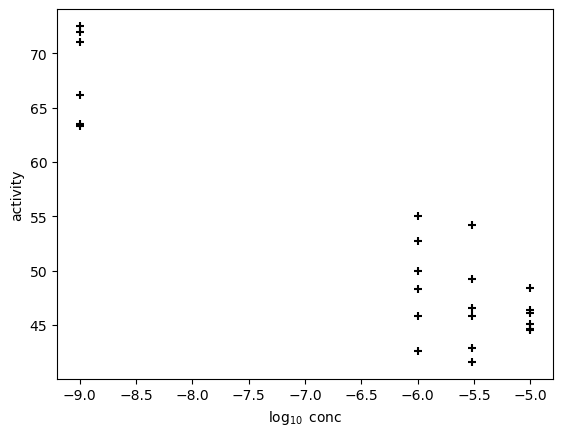

In [5]:
def data_plotter(exper='LPS neuroinflammation (BV2 cells)', assay='MTT', TI='TI23', data=data):
    fig, ax = plt.subplots()
    data_reshaped = cba.extract_regr_data('CO25360', exper, assay, TI, data, return_data_reshaped=True, accept_multi_batches=True)
    ax = cba.plot_data(ax, data_reshaped)
    return((fig, ax))

fig, ax = data_plotter(exper='LPS neuroinflammation (BV2 cells)', assay='MTT', TI='TI23')

In [6]:
data_reshaped = cba.extract_regr_data('CO25360', 'LPS neuroinflammation (BV2 cells)', 'MTT', 'TI23', data, return_data_reshaped=True, accept_multi_batches=True)
data_reshaped

CO25360 LPS neuroinflammation (BV2 cells) MTT TI23
treatment with multiple batches


,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity,std_activity
7920,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,LPS,,LPS,1.000000e-09,-9.000000,86.0,63.307561
7921,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,LPS,,LPS,1.000000e-09,-9.000000,86.2,63.454788
7922,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,LPS,,LPS,1.000000e-09,-9.000000,89.9,66.178485
7923,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,LPS,,LPS,1.000000e-09,-9.000000,96.5,71.036972
7924,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,LPS,,LPS,1.000000e-09,-9.000000,98.5,72.509241
7925,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,LPS,,LPS,1.000000e-09,-9.000000,97.7,71.920334
7902,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,TI23,Rifampicin,c1,1.000000e-05,-5.000000,63.0,46.376469
7903,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,TI23,Rifampicin,c1,1.000000e-05,-5.000000,60.5,44.536133
7904,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,TI23,Rifampicin,c1,1.000000e-05,-5.000000,60.6,44.609746
7905,CO25360,LPS neuroinflammation (BV2 cells),MTT,3,4,TI23,Rifampicin,c1,1.000000e-05,-5.000000,65.8,48.437645


In [ ]:
maindir = '../../results/2024-05-14-cell-bayes/'

if not os.path.exists(maindir + 'idatas/fpaths.csv'):
    idatadf = cba.fit_multiple_units(data, unit_list=None, accept_multi_batches=True)
    idatas = idatadf.idata
    fpathdf = cba.idatas_to_netcdf(idatas.dropna(), subdir='idatas/', maindir=maindir)
    print('idatas written to netcdf')
else:
    idatas = cba.idatas_from_netcdf(subdir='idatas/', maindir=maindir)
    print('idatas read from netcdf')

idatas = cba.sort_index_TI(idatas)
idatas

CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI1


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.
There were 262 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
There were 156 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI15


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI16


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pytensor/tensor/elemwise.py:754: RuntimeWarning: invalid value encountered in subtract
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pytensor/tensor/elemwise.py:754: RuntimeWarning: invalid value encountered in subtract
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pytensor/tensor/elemwise.py:754: RuntimeWarning: invalid value encountered in subtract
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pytensor/tensor/elemwise.py:754: RuntimeWarning: invalid value encountered in subtract
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pytensor/tensor/elemwise.py:754: Ru

CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI17


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.
There were 67 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI22


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 67 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI24


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 58 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 51 seconds.
There were 40 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 64 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI3


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI4


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 79 seconds.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IFN-γ TI9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 50 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 64 seconds.
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI16


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 68 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 56 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 25 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 46 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI24


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 58 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-10 TI9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 51 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
There were 59 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI16


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI17


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 94 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI24


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI27


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-12p70 TI9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
There were 107 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI16


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI24


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 83 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-1β TI9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI14


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI15


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI16


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI17


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 110 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI24


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distrib

CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI4


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI8


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-2 TI9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
There were 82 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 80 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI16


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI17


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI19


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
There were 111 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI20


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 63 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI23


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI24


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI25


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribu

CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 52 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 375 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distri

CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI3


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-4 TI9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
There were 91 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
There were 34 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 46 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI16


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI17


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 76 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI20


/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 46 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI24


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jonesa7/opt/anaconda3/envs/bayes/lib/python3.11/site-packages/pymc/model/core.py:1316: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ, y_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI7


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-5 TI9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-6 TI1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.


CO25360 LPS neuroinflammation (BV2 cells) IL-6 TI10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-6 TI11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
There were 56 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-6 TI12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-6 TI13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


CO25360 LPS neuroinflammation (BV2 cells) IL-6 TI14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [EC_50, y_0, FC_y, k, σ]


In [ ]:
%connect_info